In [1]:
from google.colab import files
!cp /content/drive/MyDrive/PYTHON_PRACTICE/Data_preprocessing/enviro.csv /content

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('enviro.csv')
df = df.iloc[125:1225,:12]
df.describe()

,FORMATTED DATE_TIME,Temperature,Wet Bulb Temp,Relative Humidity,Barometric Pressure,Altitude,Station Pressure,Wind Speed,Heat Index,Dew Point,Density Altitude,Wind Chill
count,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
unique,1100,22,45,225,101,140,164,1,26,99,189,21
top,10/26/22 18:50,22.2,12,33,994,173,994.1,0,20.8,4.1,511,22.2
freq,1,199,67,24,40,48,26,1100,133,43,27,161


In [4]:
df.drop(['Wet Bulb Temp', 'Barometric Pressure','Altitude','Wind Speed','Heat Index','Wind Chill'], axis =1, inplace=True)
df.head(3)

,FORMATTED DATE_TIME,Temperature,Relative Humidity,Station Pressure,Dew Point,Density Altitude
125,10/26/22 18:50,21.8,27.9,991.8,2.5,493
126,10/26/22 19:00,21.7,28.1,991.9,2.5,488
127,10/26/22 19:10,21.7,28.2,992.1,2.5,484


In [5]:
df['Station Pressure'] = df['Station Pressure'].str.replace('--', '') ##Replacing sparce string

df['Temperature'] = pd.to_numeric(df['Temperature'])
df['Relative Humidity'] = pd.to_numeric(df['Relative Humidity'])
df['Station Pressure'] = pd.to_numeric(df['Station Pressure'])
df['Dew Point'] = pd.to_numeric(df['Dew Point'])

print(df.isnull().sum().sum())


2


In [6]:
df = df.interpolate()

In [7]:
df.loc[df['Temperature'] < 21.0, 'Temp Level'] = -2 #'too cold' 
df.loc[(df['Temperature'] >= 21.0) & (df['Temperature'] <21.5), 'Temp Level'] = -1 #'cold'
df.loc[(df['Temperature'] >= 21.5) & (df['Temperature'] <22), 'Temp Level'] = 0 #'moderate'
df.loc[(df['Temperature'] >= 22) & (df['Temperature'] <22.5), 'Temp Level'] = 1 #'hot'
df.loc[df['Temperature'] >= 22.5, 'Temp Level'] = 2 #'too hot'
df.head(3)

,FORMATTED DATE_TIME,Temperature,Relative Humidity,Station Pressure,Dew Point,Density Altitude,Temp Level
125,10/26/22 18:50,21.8,27.9,991.8,2.5,493,0.0
126,10/26/22 19:00,21.7,28.1,991.9,2.5,488,0.0
127,10/26/22 19:10,21.7,28.2,992.1,2.5,484,0.0


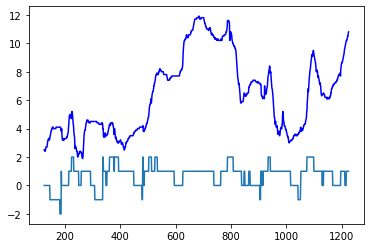

In [8]:
# plt.plot(df['Temperature'], color='blue')
plt.plot(df['Dew Point'], color='blue')
plt.plot(df['Temp Level'])
# plt.plot(df['Relative Humidity'], color='red')
# plt.plot(df['Station Pressure'], color='black')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import sklearn

In [10]:
X = df[['Relative Humidity','Station Pressure']]
y = df['Temp Level']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [11]:
# from sklearn import svm
# model = svm.SVC(kernel='rbf', gamma=1) 
# model.fit(X_train, y_train)
# print(model.score(X_test,y_test))

In [12]:
# from sklearn.neighbors import KNeighborsClassifier   
# # KNN algorith to predict test set results
# classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
# # p = output, here have diabetic or not. two outcomes
# classifier.fit(X_train, y_train)
# predictions = classifier.predict(X_test)
# print(classifier.score(X_test,y_test))
# # print('\n')
# # print(y_test)
# print(predictions)

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [14]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(kernel="poly", degree=3, C=1),
    SVC(kernel="rbf", C=1, gamma=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [15]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.8/dist-packages/sklearn/discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [16]:
df2 = pd.DataFrame()
df2['name'] = names
df2['score'] = scores

In [17]:
import seaborn as sns
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
cm = sns.light_palette("green", as_cmap=True)
s = df2.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.763636
1,Linear_SVM,0.527273
2,Polynomial_SVM,0.527273
3,RBF_SVM,0.768182
4,Gaussian_Process,0.818182
5,Gradient_Boosting,0.318182
6,Decision_Tree,0.686364
7,Extra_Trees,0.809091
8,Random_Forest,0.677273
9,Neural_Net,0.527273


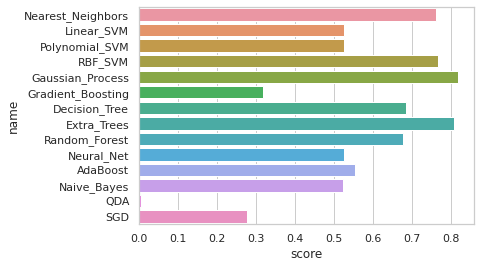

In [18]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df2)